## Importation des packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from ydata_profiling import ProfileReport
import missingno as msno #msno.matrix(df)
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from tqdm.notebook import tqdm

## Importation des fichiers CSV

In [2]:
edl_es = pd.read_csv(r"C:\Users\thiba\Documents\Projet_Final\Fichier CSV\EDL Entrant avec EDL sortant corresp Constat.csv", sep=';')
edl_patrimoine = pd.read_csv(r"C:\Users\thiba\Documents\Projet_Final\Fichier CSV\EDL_0 Sortants_Patrimoines_Locataires.csv", sep=';', low_memory=False)
edl_sollicitation = pd.read_csv(r"C:\Users\thiba\Documents\Projet_Final\Fichier CSV\EDL_1 Sollicitations GRC.csv", sep=';')
edl_enquete = pd.read_csv(r"C:\Users\thiba\Documents\Projet_Final\Fichier CSV\EDL_3 Frais Non-Rep Enquetes.csv", sep=';')
edl_ost = pd.read_csv(r"C:\Users\thiba\Documents\Projet_Final\Fichier CSV\EDL_4 Labels OST Non Valeur.csv", sep=';')
edl_travaux = pd.read_csv(r"C:\Users\thiba\Documents\Projet_Final\Fichier CSV\EDL_Nb contrats_ Mt Factures Travaux - V2.csv", sep=';')

# EDA

## EDL_ES = Etat des lieux Entrant Sortant

In [3]:
edl_es

,Unnamed: 0,CD_PATRIM,NO_CTRACLI,DTD_CTRAT,DTF_CTRAT,NO_EDL_ENT,NO_CONSEDL_ENT,CD_TYPEDL_ENT,DT_DOSEDL_ENT,ID_PERS_ENT,NO_EDL_SOR,NO_CONSEDL_SOR,CD_TYPEDL_SOR,DT_DOSEDL_SOR,ID_PERS_SOR,LB_CONTENU1,LB_CONTENU2,LB_NOTSANT_ENT,LB_NOTSANT_SOR
0,0,00001-00001-00001-00001,233486,2015-07-17,2017-07-23,87915,3,EDL ENTRANT,2015-07-17,729,103148.0,3.0,EDL SORTANT,2017-07-20,798.0,CELLIER,ARRIVEE M.A.LAVER,BON ETAT,BON ETAT
1,1,00001-00001-00001-00001,233486,2015-07-17,2017-07-23,87915,3,EDL ENTRANT,2015-07-17,729,103148.0,3.0,EDL SORTANT,2017-07-20,798.0,CELLIER,ACCESS. ELECTRIQUES,USURE NORM,USURE NORM
2,2,00001-00001-00001-00001,233486,2015-07-17,2017-07-23,87915,3,EDL ENTRANT,2015-07-17,729,103148.0,3.0,EDL SORTANT,2017-07-20,798.0,CELLIER,INTERRUPTEURS ELECT.,NEUF,NEUF
3,3,00001-00001-00001-00001,233486,2015-07-17,2017-07-23,87915,3,EDL ENTRANT,2015-07-17,729,103148.0,3.0,EDL SORTANT,2017-07-20,798.0,CELLIER,PRISES ELECTRIQUES,USURE NORM,USURE NORM
4,4,00001-00001-00001-00001,233486,2015-07-17,2017-07-23,87915,3,EDL ENTRANT,2015-07-17,729,103148.0,3.0,EDL SORTANT,2017-07-20,798.0,CELLIER,EVACUATION,BON ETAT,BON ETAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2734137,2734137,11856-00001-00002-00022,281304,2020-06-15,1900-01-01,124384,4,EDL ENTRANT,2020-07-03,555,NaN,NaN,NaN,NaN,NaN,CHAMBRE 1,PLAFOND,BON ETAT,NaN
2734138,2734138,11856-00001-00002-00022,281304,2020-06-15,1900-01-01,124384,4,EDL ENTRANT,2020-07-03,555,NaN,NaN,NaN,NaN,NaN,CHAMBRE 1,PLINTHE,BON ETAT,NaN
2734139,2734139,11856-00001-00002-00022,281304,2020-06-15,1900-01-01,124384,4,EDL ENTRANT,2020-07-03,555,NaN,NaN,NaN,NaN,NaN,CHAMBRE 1,PORTE,BON ETAT,NaN
2734140,2734140,11856-00001-00002-00022,281304,2020-06-15,1900-01-01,124384,4,EDL ENTRANT,2020-07-03,555,NaN,NaN,NaN,NaN,NaN,CHAMBRE 1,PORTE COULISSANTE,USURE NORM,NaN


dimension du DataFrame:

In [4]:
edl_es.shape

(2734142, 19)

type des colonnes:

In [5]:
edl_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734142 entries, 0 to 2734141
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   CD_PATRIM       object 
 2   NO_CTRACLI      int64  
 3   DTD_CTRAT       object 
 4   DTF_CTRAT       object 
 5   NO_EDL_ENT      int64  
 6   NO_CONSEDL_ENT  int64  
 7   CD_TYPEDL_ENT   object 
 8   DT_DOSEDL_ENT   object 
 9   ID_PERS_ENT     int64  
 10  NO_EDL_SOR      float64
 11  NO_CONSEDL_SOR  float64
 12  CD_TYPEDL_SOR   object 
 13  DT_DOSEDL_SOR   object 
 14  ID_PERS_SOR     float64
 15  LB_CONTENU1     object 
 16  LB_CONTENU2     object 
 17  LB_NOTSANT_ENT  object 
 18  LB_NOTSANT_SOR  object 
dtypes: float64(3), int64(5), object(11)
memory usage: 396.3+ MB


nombre de valeurs manquante:

In [6]:
edl_es.isna().sum()

Unnamed: 0              0
CD_PATRIM               0
NO_CTRACLI              0
DTD_CTRAT               0
DTF_CTRAT               0
NO_EDL_ENT              0
NO_CONSEDL_ENT          0
CD_TYPEDL_ENT           0
DT_DOSEDL_ENT           0
ID_PERS_ENT             0
NO_EDL_SOR        1574118
NO_CONSEDL_SOR    1574118
CD_TYPEDL_SOR     1574118
DT_DOSEDL_SOR     1574118
ID_PERS_SOR       1574118
LB_CONTENU1           871
LB_CONTENU2           871
LB_NOTSANT_ENT      22198
LB_NOTSANT_SOR    1593230
dtype: int64

affichage graphique des valeurs manquantes:

<Axes: >

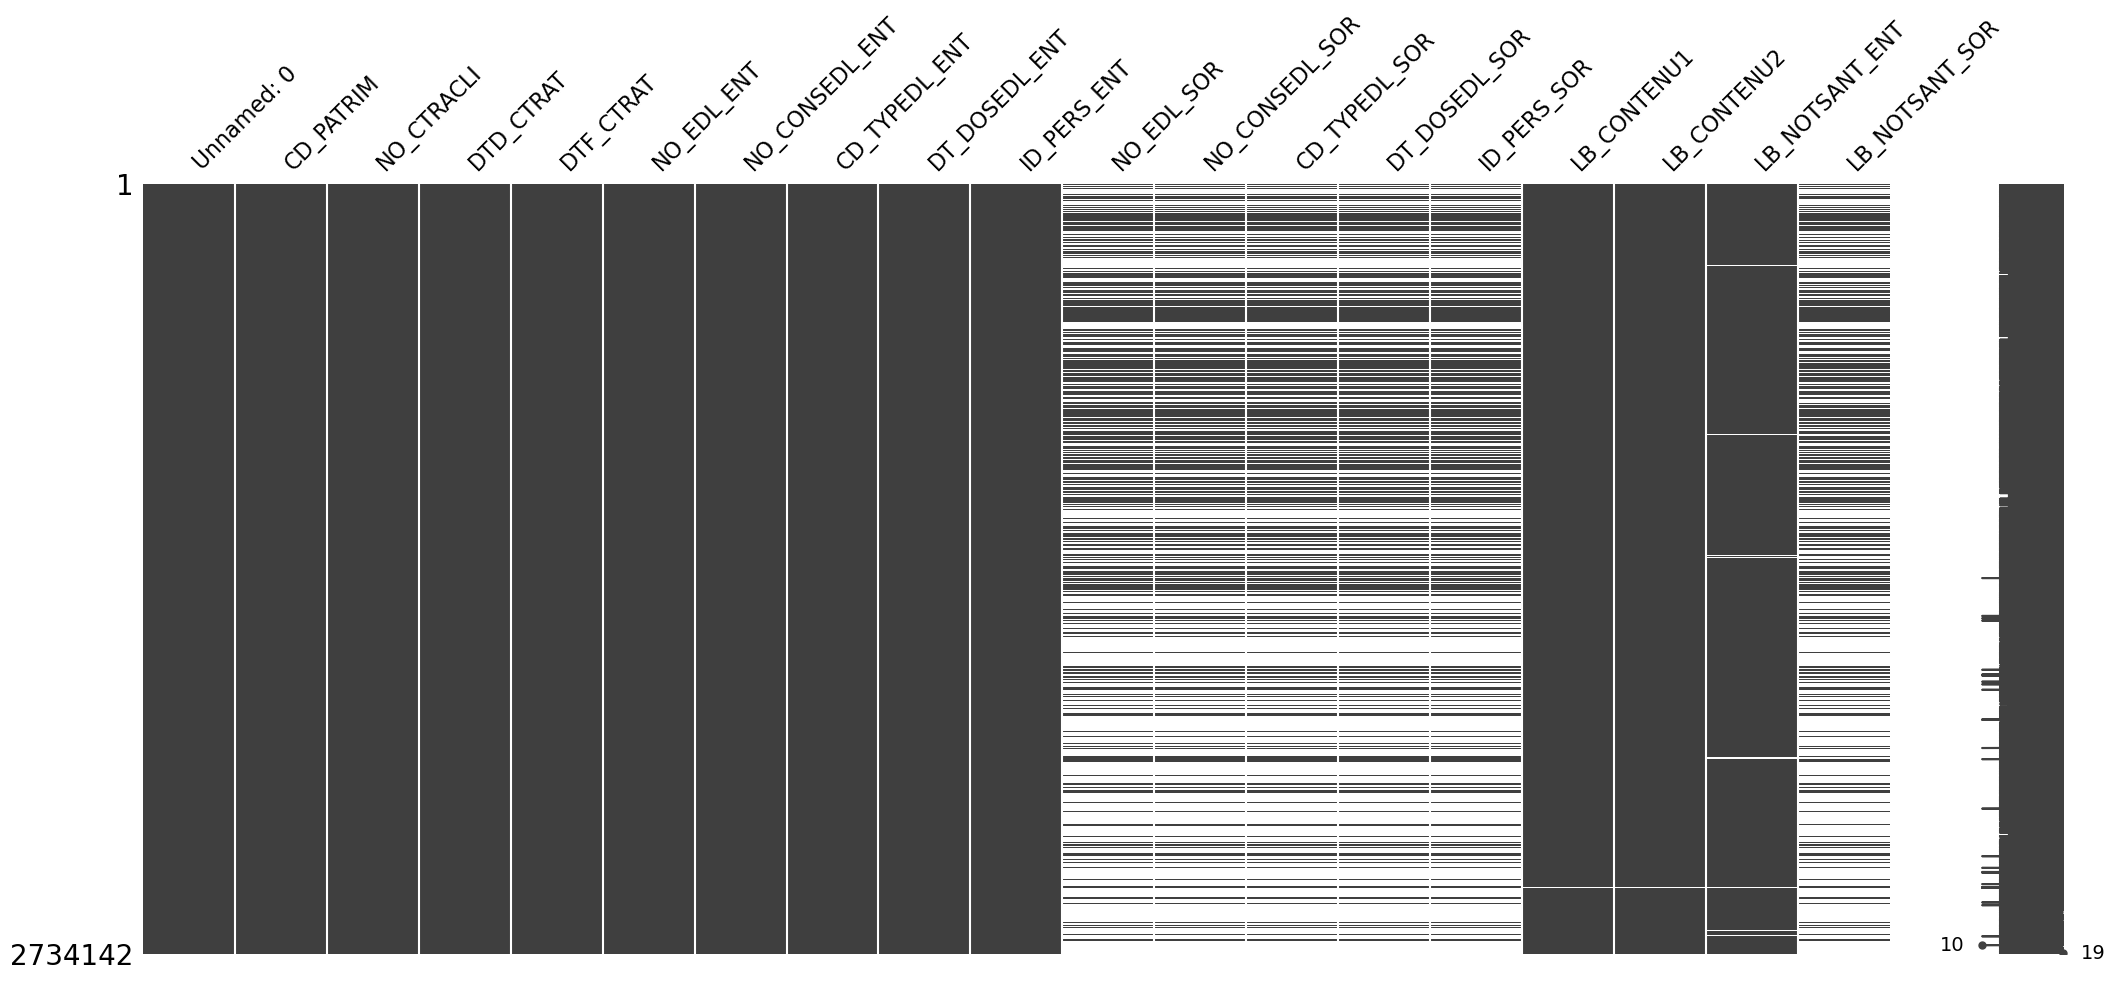

In [7]:
msno.matrix(edl_es)

## EDL_patrimoine = Patrimoines des locataires sortant

In [8]:
edl_patrimoine

,ANNEE EDL SORTANT,CD_PATRIM1,CD_PATRIM2,CD_PATRIM3,CD_PATRIM4,CD_PATRIM,CD_SECTO_TERRITOIRE,CD_SECTO_ANTENNE,CD_SECTO_CS,LB_SECTO_TERRITOIRE,...,SID_PLG_MTDET_A_FIN_CONTRAT,SID_PLG_ECHLOYPLG_ECHLOY_A_FIN_CONTRAT,NB_ECHRES_A_FIN_CONTRAT,DATE_PREM_IMPAYE,MT_SOLD_DEB_PREM_IMPAYE,SID_PLG_MTDET_PREM_IMPAYE,PLAGE AGE DETTE_PREM_IMPAYE,DT_ECH_PREIMP,NB_MOIS_OCC_PREM_IMPAYE,DT_ALIM
0,2007,1,1,1,2,00001-00001-00001-00002,3FERN,01,01,FERNEY - PAYS DE GEX - BELLEG.,...,NaN,NaN,0,NaN,"0,00",NaN,NaN,NaN,0,2023-06-07
1,2007,1,1,1,12,00001-00001-00001-00012,3FERN,01,01,FERNEY - PAYS DE GEX - BELLEG.,...,NaN,NaN,0,NaN,"0,00",NaN,NaN,NaN,0,2023-06-07
2,2007,1,1,1,34,00001-00001-00001-00034,3FERN,01,01,FERNEY - PAYS DE GEX - BELLEG.,...,NaN,NaN,0,NaN,"0,00",NaN,NaN,NaN,0,2023-06-07
3,2007,3,1,3,12,00003-00001-00003-00012,1BOUR,02,02,BOURG - DOMBES - VAL DE SAONE,...,NaN,NaN,0,NaN,"0,00",NaN,NaN,NaN,0,2023-06-07
4,2007,4,1,1,11,00004-00001-00001-00011,1BOUR,02,02,BOURG - DOMBES - VAL DE SAONE,...,NaN,NaN,0,NaN,"0,00",NaN,NaN,NaN,0,2023-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38961,2023,11796,1,1,1,11796-00001-00001-00001,3FERN,02,02,FERNEY - PAYS DE GEX - BELLEG.,...,NaN,NaN,0,NaN,"0,00",NaN,NaN,NaN,0,2023-06-07
38962,2023,11796,1,1,44,11796-00001-00001-00044,3FERN,02,02,FERNEY - PAYS DE GEX - BELLEG.,...,Moins de 1 000€,Moins de 3 échéances,0,NaN,"0,00",NaN,NaN,NaN,0,2023-06-07
38963,2023,11812,1,1,11,11812-00001-00001-00011,3FERN,02,02,FERNEY - PAYS DE GEX - BELLEG.,...,NaN,NaN,0,NaN,"0,00",NaN,NaN,NaN,0,2023-06-07
38964,2023,11814,1,1,1,11814-00001-00001-00001,3FERN,02,01,FERNEY - PAYS DE GEX - BELLEG.,...,NaN,NaN,0,NaN,"0,00",NaN,NaN,NaN,0,2023-06-07


dimension du DataFrame:

In [9]:
edl_patrimoine.shape

(38966, 207)

nombre de valeurs manquantes

In [10]:
edl_patrimoine.isna().sum()

ANNEE EDL SORTANT                  0
CD_PATRIM1                         0
CD_PATRIM2                         0
CD_PATRIM3                         0
CD_PATRIM4                         0
                               ...  
SID_PLG_MTDET_PREM_IMPAYE      32313
PLAGE AGE DETTE_PREM_IMPAYE    32313
DT_ECH_PREIMP                  32313
NB_MOIS_OCC_PREM_IMPAYE            0
DT_ALIM                            0
Length: 207, dtype: int64

type de colonnes:

In [11]:
edl_patrimoine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38966 entries, 0 to 38965
Columns: 207 entries, ANNEE EDL SORTANT to DT_ALIM
dtypes: float64(54), int64(54), object(99)
memory usage: 61.5+ MB


affichage graphique des valeurs manquantes 

<Axes: >

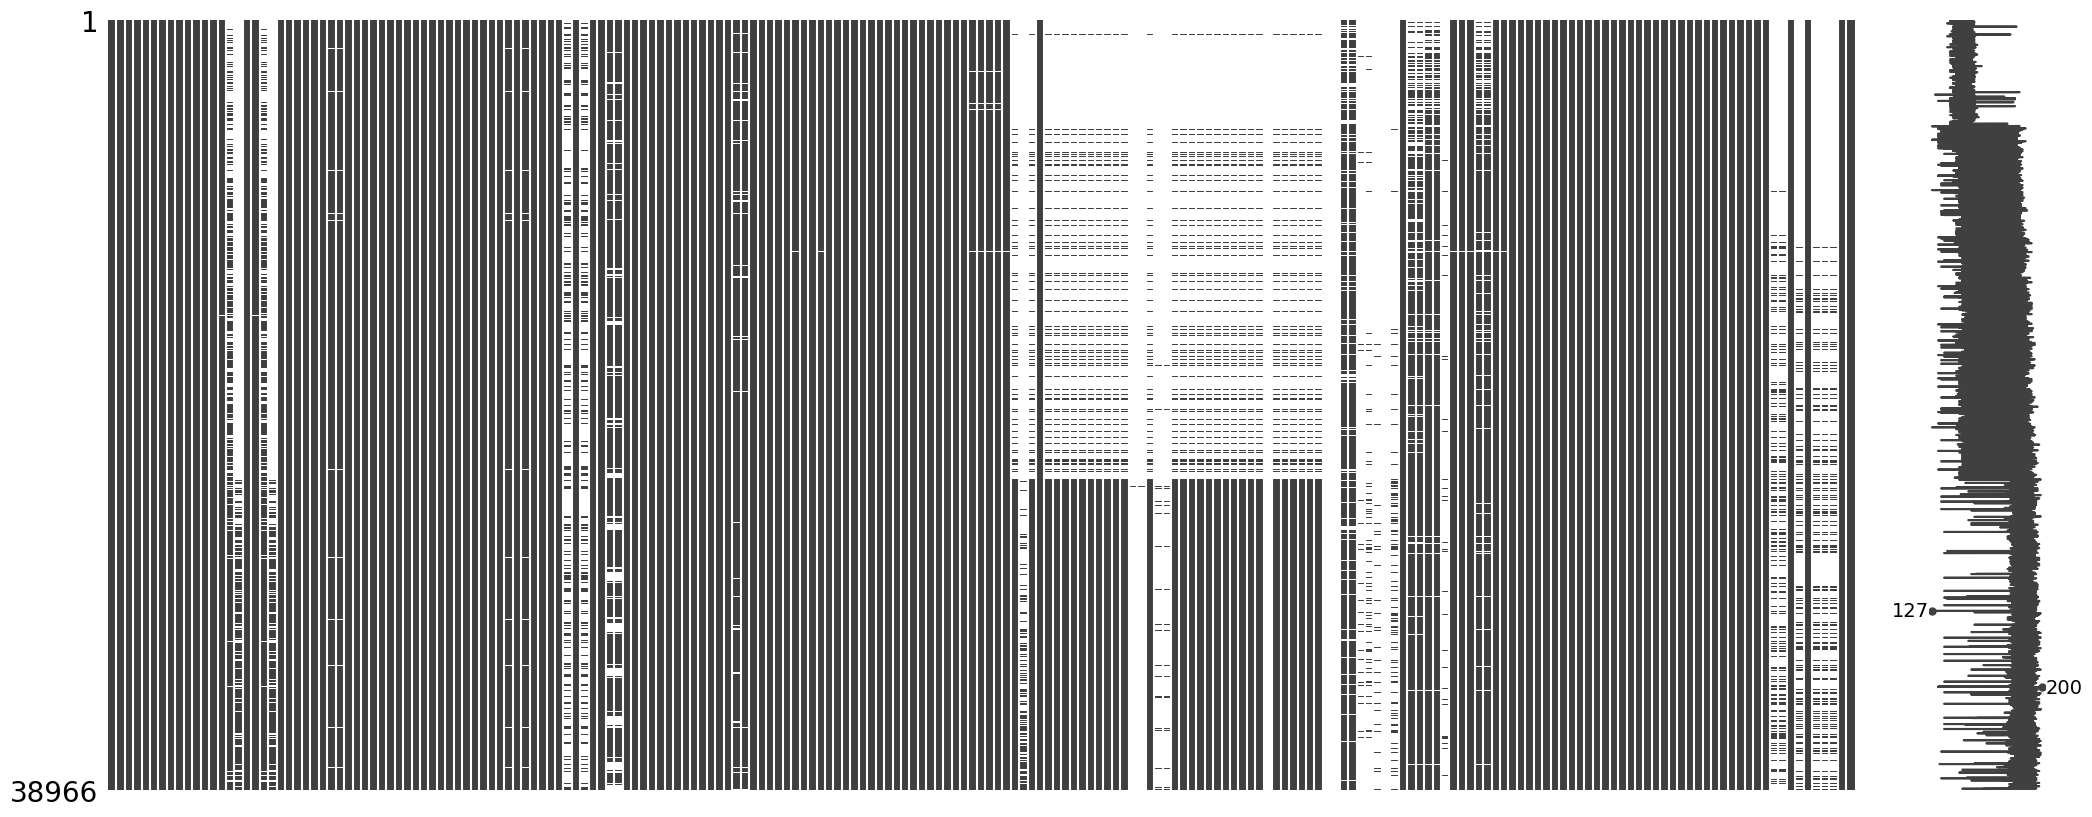

In [12]:
msno.matrix(edl_patrimoine)

## EDL_sollicitation = description des travaux/entretiens pour un logement, demander par le locataire 

In [13]:
edl_sollicitation

,ID_DOSCLIE,NO_DOSFACT,NO_CTRACLI,PERS PHYSIQUE_MORALE,DTD_CTRAT,DTF_CTRAT,CD_PATRIM,CD_PATRIM1,CD_PATRIM2,CD_PATRIM3,...,AFFAIRE_ENTRETIEN_REFUSEE,AFFAIRE_ENTRETIEN_ENCOURS,AFFAIRE_ENTRETIEN_SOLDEE,AFFAIRE_RELATIONNELLE_TOTAL,AFFAIRE_RELATIONNELLE_ANNULEE,AFFAIRE_RELATIONNELLE_REFUSEE,AFFAIRE_RELATIONNELLE_ENCOURS,AFFAIRE_RELATIONNELLE_SOLDEE,AFFAIRE_AUTRE,DT_ALIM
0,175747,10290,10290,P,2012-06-15,2013-03-05,00418-00001-00001-00032,418,1,1,...,0,0,1,0,0,0,0,0,0,2023-06-07 00:00:00.000
1,175747,10290,10290,P,2012-06-15,2013-03-05,00418-00001-00001-00032,418,1,1,...,0,0,1,0,0,0,0,0,0,2023-06-07 00:00:00.000
2,175747,10290,10290,P,2012-06-15,2013-03-05,00418-00001-00001-00032,418,1,1,...,0,0,1,0,0,0,0,0,0,2023-06-07 00:00:00.000
3,175747,10290,10290,P,2012-06-15,2013-03-05,00418-00001-00001-00032,418,1,1,...,0,0,1,0,0,0,0,0,0,2023-06-07 00:00:00.000
4,175747,10290,10290,P,2012-06-15,2013-03-05,00418-00001-00001-00032,418,1,1,...,0,0,1,0,0,0,0,0,0,2023-06-07 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973945,1004537,306309,306082,P,2023-06-12,1900-01-01,01701-00006-00001-00022,1701,6,1,...,0,0,1,0,0,0,0,0,0,2023-06-07 00:00:00.000
973946,1004537,306309,306082,P,2023-06-12,1900-01-01,01701-00006-00001-00022,1701,6,1,...,0,0,1,0,0,0,0,0,0,2023-06-07 00:00:00.000
973947,1004537,306309,306082,P,2023-06-12,1900-01-01,01701-00006-00001-00022,1701,6,1,...,0,0,1,0,0,0,0,0,0,2023-06-07 00:00:00.000
973948,1004537,306309,306082,P,2023-06-12,1900-01-01,01701-00006-00001-00022,1701,6,1,...,0,0,1,0,0,0,0,0,0,2023-06-07 00:00:00.000


dimension du DataFrame:

In [14]:
edl_sollicitation.shape

(973950, 33)

type des colonnes:

In [15]:
edl_sollicitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973950 entries, 0 to 973949
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ID_DOSCLIE                     973950 non-null  int64 
 1   NO_DOSFACT                     973950 non-null  int64 
 2   NO_CTRACLI                     973950 non-null  int64 
 3   PERS PHYSIQUE_MORALE           973933 non-null  object
 4   DTD_CTRAT                      973950 non-null  object
 5   DTF_CTRAT                      973950 non-null  object
 6   CD_PATRIM                      973950 non-null  object
 7   CD_PATRIM1                     973950 non-null  int64 
 8   CD_PATRIM2                     973950 non-null  int64 
 9   CD_PATRIM3                     973950 non-null  int64 
 10  CD_PATRIM4                     973950 non-null  int64 
 11  NO_AFFAIRE                     973950 non-null  int64 
 12  DATE AFFAIRE                   973950 non-nu

affichage des valeurs manquantes:

In [16]:
edl_sollicitation.isna().sum()

ID_DOSCLIE                            0
NO_DOSFACT                            0
NO_CTRACLI                            0
PERS PHYSIQUE_MORALE                 17
DTD_CTRAT                             0
DTF_CTRAT                             0
CD_PATRIM                             0
CD_PATRIM1                            0
CD_PATRIM2                            0
CD_PATRIM3                            0
CD_PATRIM4                            0
NO_AFFAIRE                            0
DATE AFFAIRE                          0
CD_ETAT_AF                            0
LB_ETAT_AF                            0
CD_QUALIF1                            0
CD_QUALIF2                        13897
CD_QUALIF3                       157030
LB_QUALIF1                            3
LB_QUALIF2                        13956
LB_QUALIF3                       157042
AFFAIRE_ENTRETIEN_TOTAL               0
AFFAIRE_ENTRETIEN_ANNULEE             0
AFFAIRE_ENTRETIEN_REFUSEE             0
AFFAIRE_ENTRETIEN_ENCOURS             0


affichage graphique des valeurs manquantes:

<Axes: >

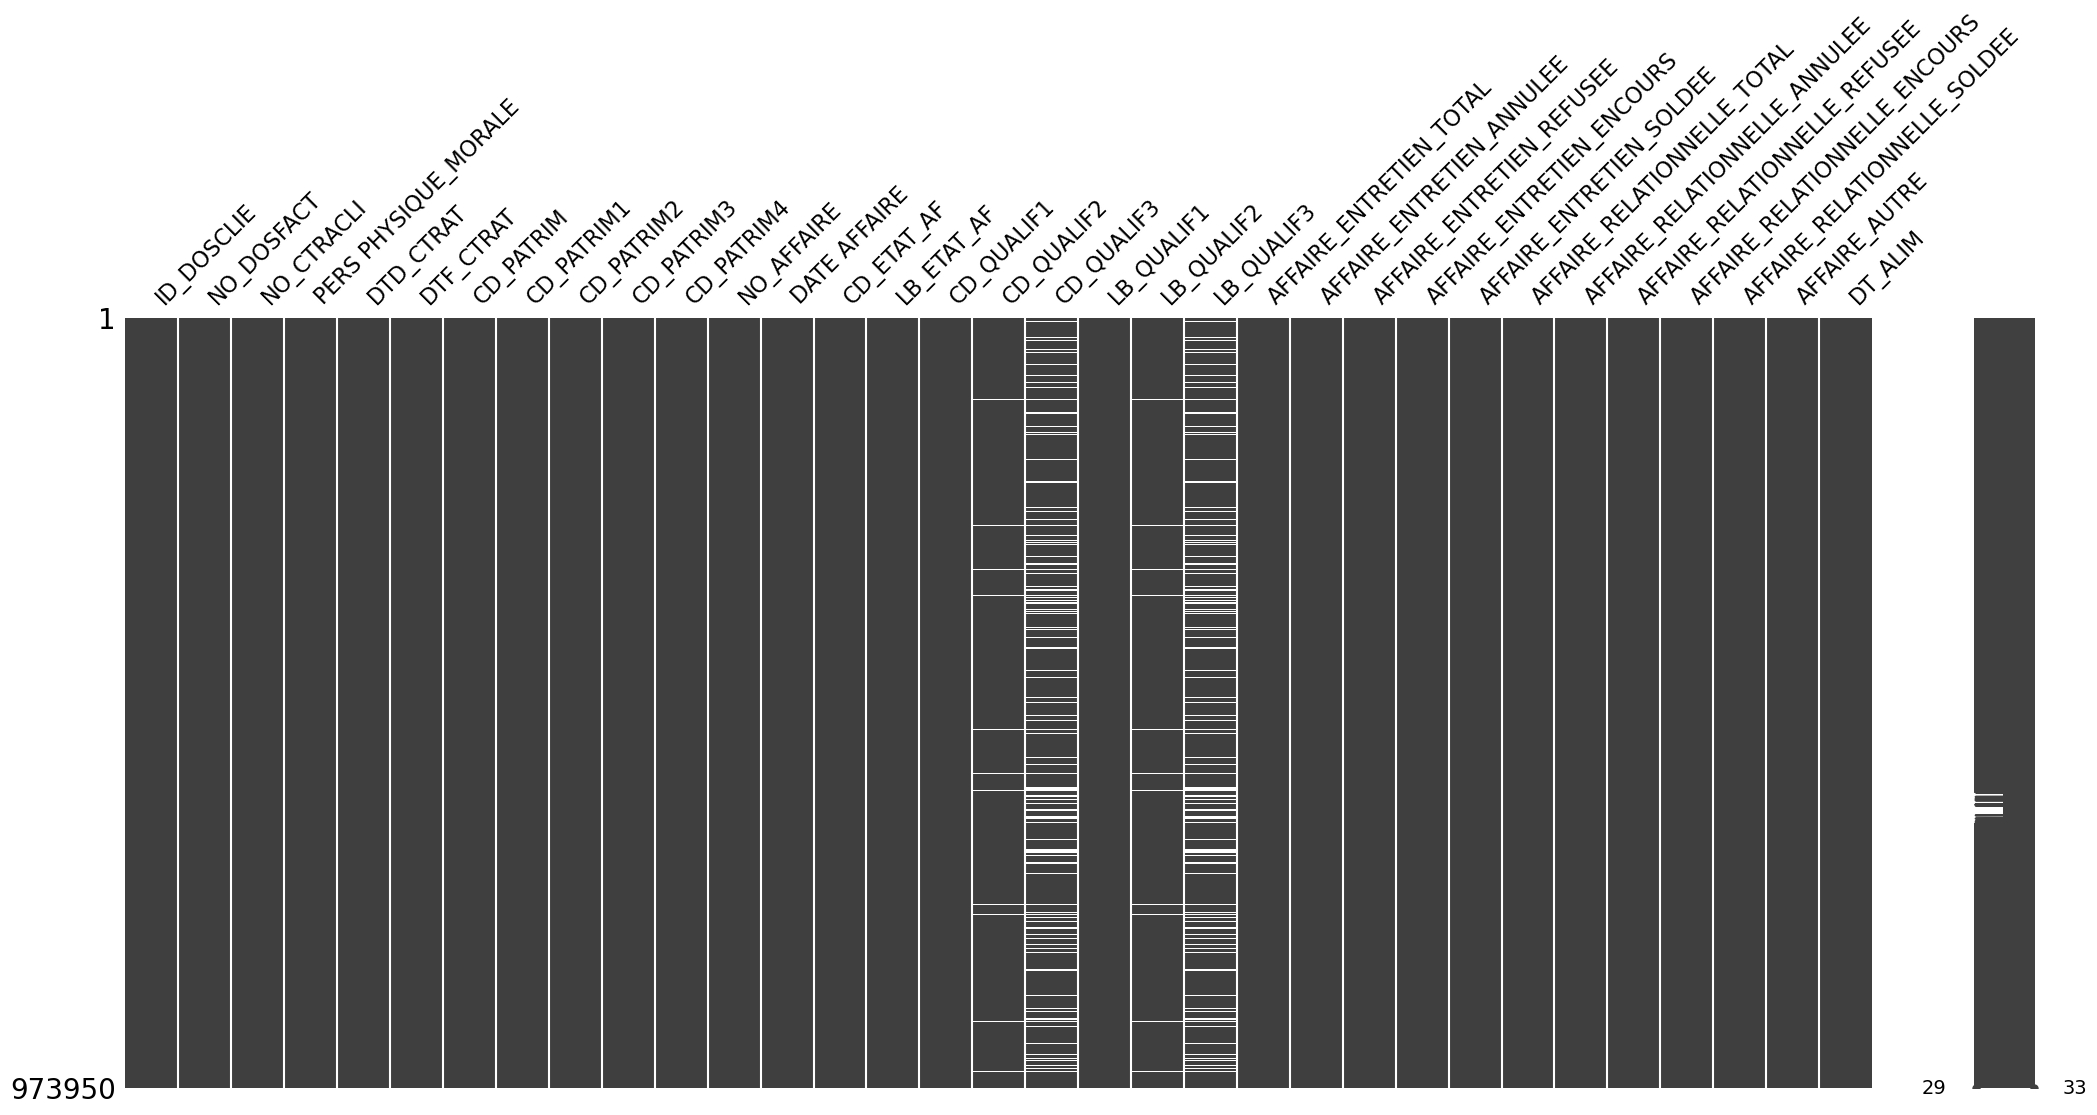

In [17]:
msno.matrix(edl_sollicitation)

## EDL_enquete = frais de non reponses aux enquetes 

In [18]:
edl_enquete

,ID_DOSCLIE,NO_DOSFACT,NO_CTRACLI,PERS PHYSIQUE_MORALE,DTD_CTRAT,DTF_CTRAT,CD_PATRIM,CD_PATRIM1,CD_PATRIM2,CD_PATRIM3,CD_PATRIM4,DEBUT_FRAIS_DT_SID_FACTURA_GIM,FIN_FRAIS_DT_SID_FACTURA_GIM,CPT_PENALITE RETARD_SLS_EOS,MT_CPT_PENALITE RETARD_SLS_EOS,CPT_FRAIS DOSS_SLS_EOS,MT_FRAIS DOSS_SLS_EOS,DT_ALIM
0,163171,65649,65649,P,2010-07-01,1900-01-01,00391-00001-00001-00024,391,1,1,24,2022-02-28,2023-02-28,1,"7,62",1,"25,00",2023-06-07 00:00:00.000
1,58439,100246,100246,P,2008-01-01,2019-04-01,00403-00002-00001-00034,403,2,1,34,2014-01-31,2019-01-31,6,"45,72",1,"25,00",2023-06-07 00:00:00.000
2,16939,163712,163566,P,2007-01-01,2017-08-30,00119-00001-00001-00062,119,1,1,62,2014-01-31,2014-06-30,6,"45,72",0,"0,00",2023-06-07 00:00:00.000
3,101538,163737,163591,P,2007-01-01,1900-01-01,00037-00001-00004-00012,37,1,4,12,2014-01-31,2022-02-28,4,"30,48",2,"50,00",2023-06-07 00:00:00.000
4,3676,163817,163670,P,2007-01-13,1900-01-01,00213-00001-00001-00023,213,1,1,23,2020-01-31,2020-01-31,1,"7,62",0,"0,00",2023-06-07 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,924542,300389,300162,P,2022-09-21,1900-01-01,00986-00002-00001-00031,986,2,1,31,2023-02-28,2023-02-28,0,"0,00",1,"25,00",2023-06-07 00:00:00.000
8689,925059,300436,300209,P,2022-09-19,1900-01-01,00664-00001-00002-00012,664,1,2,12,2023-02-28,2023-02-28,0,"0,00",1,"25,00",2023-06-07 00:00:00.000
8690,925523,300466,300239,P,2022-09-30,1900-01-01,00956-00001-00001-00011,956,1,1,11,2023-02-28,2023-02-28,0,"0,00",1,"25,00",2023-06-07 00:00:00.000
8691,925536,300484,300257,P,2022-09-30,1900-01-01,11767-00001-00001-00043,11767,1,1,43,2023-02-28,2023-02-28,0,"0,00",1,"25,00",2023-06-07 00:00:00.000


dimension du DataFrame:

In [19]:
edl_enquete.shape

(8693, 18)

type des colonnes:

In [20]:
edl_enquete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID_DOSCLIE                      8693 non-null   int64 
 1   NO_DOSFACT                      8693 non-null   int64 
 2   NO_CTRACLI                      8693 non-null   int64 
 3   PERS PHYSIQUE_MORALE            8692 non-null   object
 4   DTD_CTRAT                       8693 non-null   object
 5   DTF_CTRAT                       8693 non-null   object
 6   CD_PATRIM                       8693 non-null   object
 7   CD_PATRIM1                      8693 non-null   int64 
 8   CD_PATRIM2                      8693 non-null   int64 
 9   CD_PATRIM3                      8693 non-null   int64 
 10  CD_PATRIM4                      8693 non-null   int64 
 11  DEBUT_FRAIS_DT_SID_FACTURA_GIM  8693 non-null   object
 12  FIN_FRAIS_DT_SID_FACTURA_GIM    8693 non-null   

affichage des valeurs manquantes:

In [21]:
edl_enquete.isna().sum()

ID_DOSCLIE                        0
NO_DOSFACT                        0
NO_CTRACLI                        0
PERS PHYSIQUE_MORALE              1
DTD_CTRAT                         0
DTF_CTRAT                         0
CD_PATRIM                         0
CD_PATRIM1                        0
CD_PATRIM2                        0
CD_PATRIM3                        0
CD_PATRIM4                        0
DEBUT_FRAIS_DT_SID_FACTURA_GIM    0
FIN_FRAIS_DT_SID_FACTURA_GIM      0
CPT_PENALITE RETARD_SLS_EOS       0
MT_CPT_PENALITE RETARD_SLS_EOS    0
CPT_FRAIS DOSS_SLS_EOS            0
MT_FRAIS DOSS_SLS_EOS             0
DT_ALIM                           0
dtype: int64

affichage graphique des valeurs manquantes:

<Axes: >

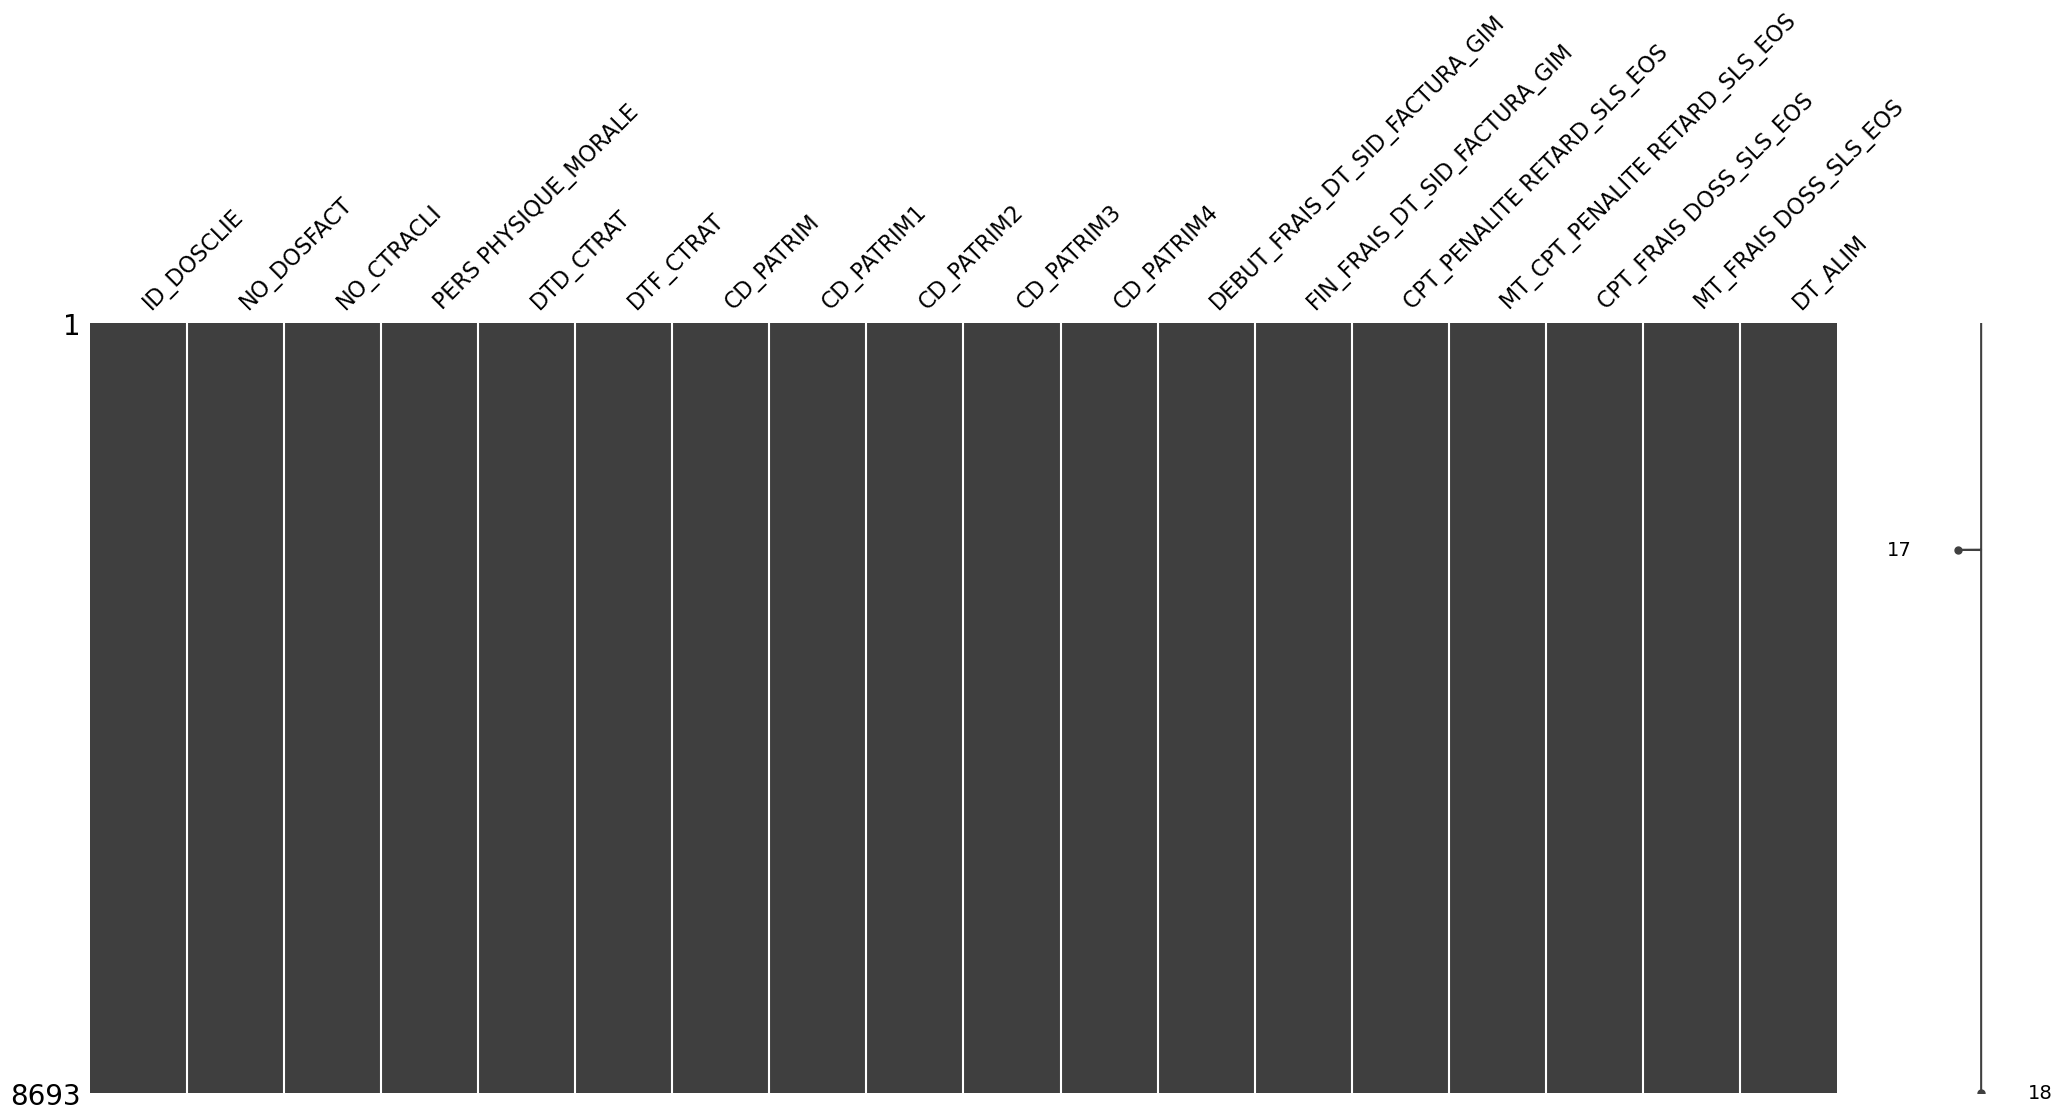

In [22]:
msno.matrix(edl_enquete)

## EDL_OST = Occupant Sans droit ni Titre

In [23]:
edl_ost

,ID_DOSCLIE,NO_DOSFACT,NO_CTRACLI,PERS PHYSIQUE_MORALE,DTD_CTRAT,DTF_CTRAT,CD_PATRIM,CD_PATRIM1,CD_PATRIM2,CD_PATRIM3,CD_PATRIM4,CPT_OST,NB_ECHEANCES_NON VALEUR,MT_NON VALEUR,TRANCHE_MT_NON VALEUR,DT_ALIM
0,1043,81,81,P,1978-07-01,1983-03-31,00003-00001-00003-00032,3,1,3,32,0,1,NaN,NaN,2023-06-07 00:00:00.000
1,166154,146,146,P,2002-06-18,2006-05-09,00004-00001-00001-00022,4,1,1,22,0,1,158.01,3.MT_NON VALEUR >= 100 et < 500 euros,2023-06-07 00:00:00.000
2,103301,157,157,P,1989-07-01,2005-05-19,00004-00001-00001-00032,4,1,1,32,0,1,485.96,3.MT_NON VALEUR >= 100 et < 500 euros,2023-06-07 00:00:00.000
3,1327,235,235,P,1993-06-01,2013-07-31,00004-00001-00003-00012,4,1,3,12,0,2,204.76,3.MT_NON VALEUR >= 100 et < 500 euros,2023-06-07 00:00:00.000
4,1326,238,238,P,1980-12-01,1984-03-31,00004-00001-00003-00022,4,1,3,22,0,1,NaN,NaN,2023-06-07 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12831,845011,294323,294097,P,2022-01-18,1900-01-01,00271-00001-00001-00011,271,1,1,11,1,0,NaN,NaN,2023-06-07 00:00:00.000
12832,847130,294656,294430,P,2022-01-14,1900-01-01,00467-00001-00001-00043,467,1,1,43,1,0,NaN,NaN,2023-06-07 00:00:00.000
12833,852657,295284,295058,P,2022-02-03,2022-06-05,00048-00001-00001-00012,48,1,1,12,0,1,21.92,2.MT_NON VALEUR >= 5 et < 100 euros,2023-06-07 00:00:00.000
12834,867169,296432,296206,P,2022-04-04,1900-01-01,01152-00001-00001-00021,1152,1,1,21,1,0,NaN,NaN,2023-06-07 00:00:00.000



dimension du DataFrame:

In [24]:
edl_ost.shape

(12836, 16)

type des colonnes:

In [25]:
edl_ost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12836 entries, 0 to 12835
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_DOSCLIE               12836 non-null  int64  
 1   NO_DOSFACT               12836 non-null  int64  
 2   NO_CTRACLI               12836 non-null  int64  
 3   PERS PHYSIQUE_MORALE     12836 non-null  object 
 4   DTD_CTRAT                12836 non-null  object 
 5   DTF_CTRAT                12836 non-null  object 
 6   CD_PATRIM                12836 non-null  object 
 7   CD_PATRIM1               12836 non-null  int64  
 8   CD_PATRIM2               12836 non-null  int64  
 9   CD_PATRIM3               12836 non-null  int64  
 10  CD_PATRIM4               12836 non-null  int64  
 11  CPT_OST                  12836 non-null  int64  
 12  NB_ECHEANCES_NON VALEUR  12836 non-null  int64  
 13  MT_NON VALEUR            5252 non-null   float64
 14  TRANCHE_MT_NON VALEUR 

affichage des valeurs manquantes:

In [26]:
edl_ost.isna().sum()

ID_DOSCLIE                    0
NO_DOSFACT                    0
NO_CTRACLI                    0
PERS PHYSIQUE_MORALE          0
DTD_CTRAT                     0
DTF_CTRAT                     0
CD_PATRIM                     0
CD_PATRIM1                    0
CD_PATRIM2                    0
CD_PATRIM3                    0
CD_PATRIM4                    0
CPT_OST                       0
NB_ECHEANCES_NON VALEUR       0
MT_NON VALEUR              7584
TRANCHE_MT_NON VALEUR      7584
DT_ALIM                       0
dtype: int64

affichage graphique des valeurs manquantes:

<Axes: >

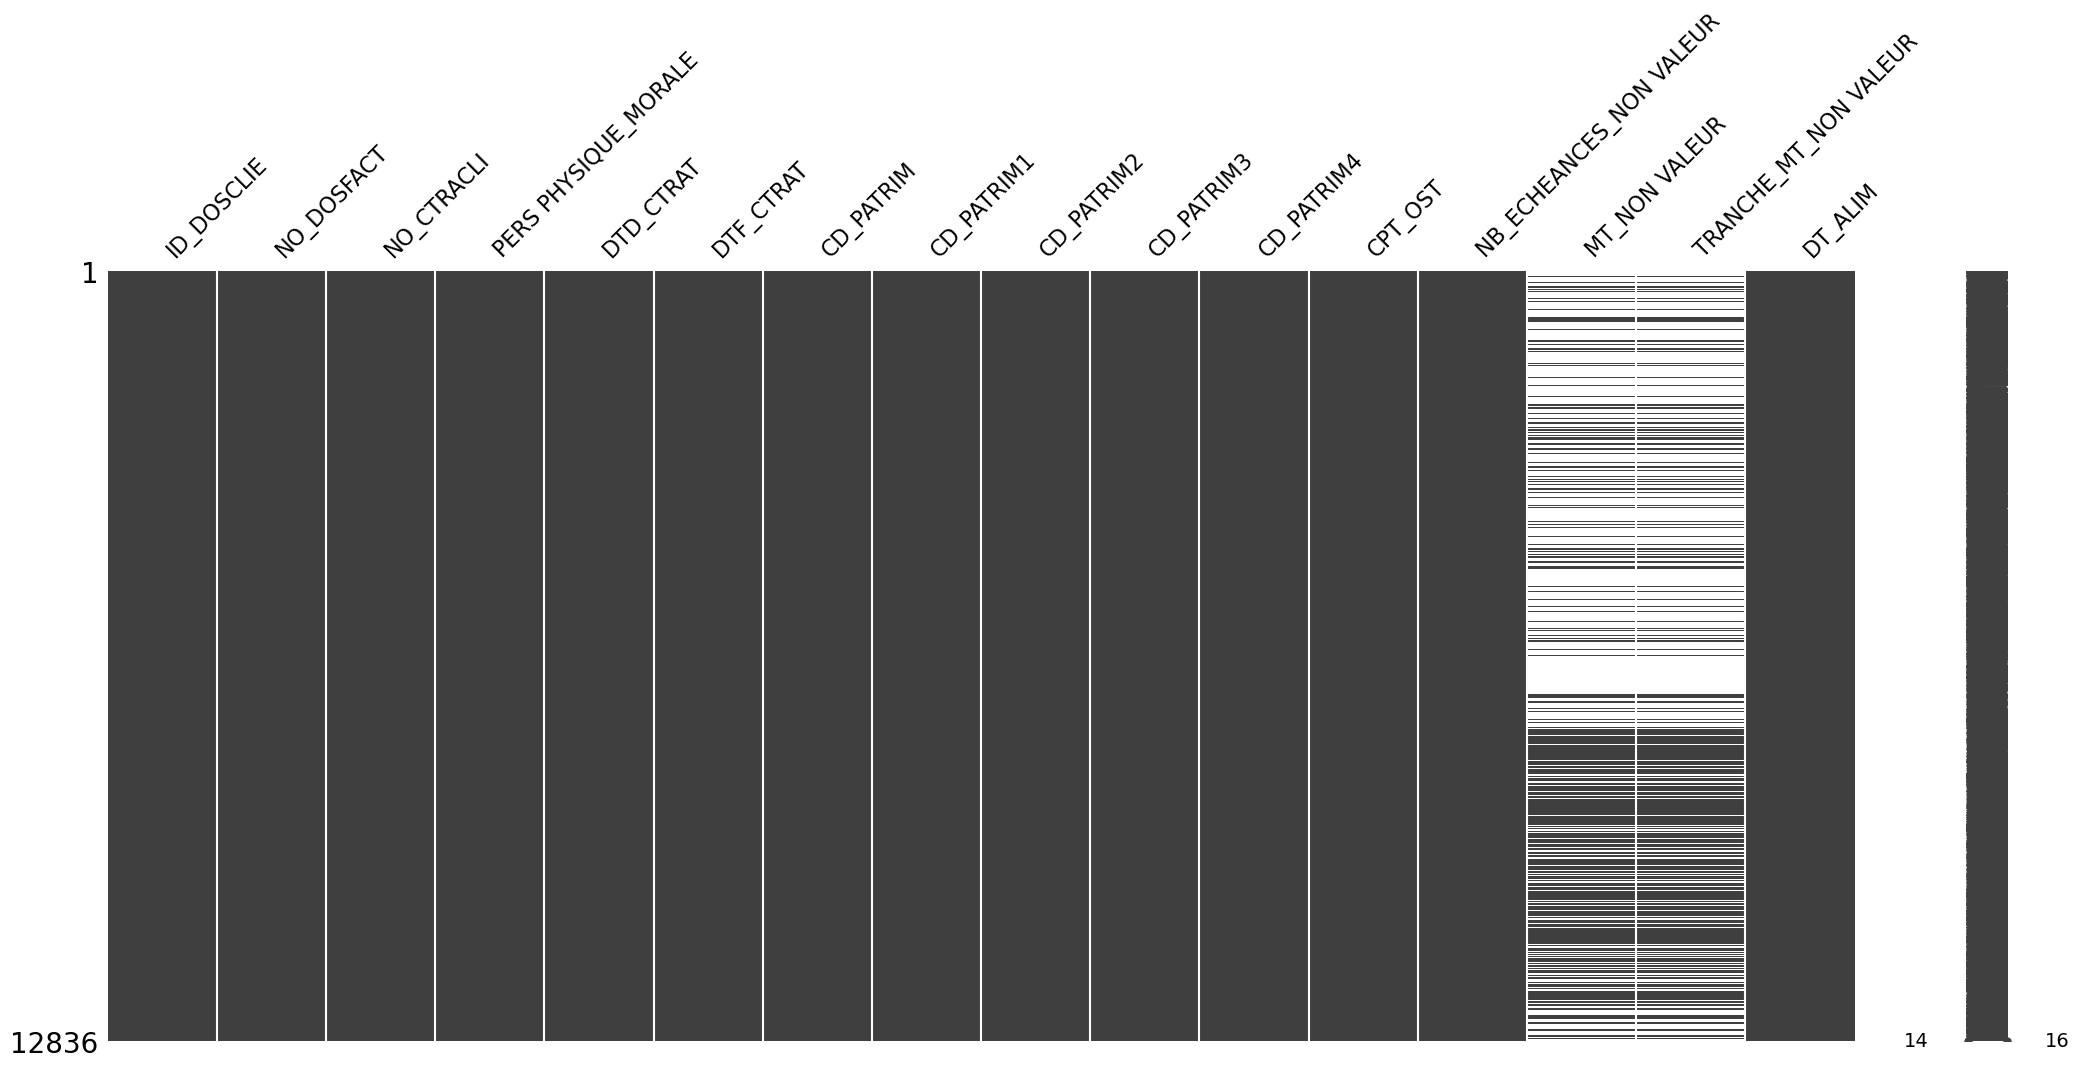

In [27]:
msno.matrix(edl_ost)

## EDL_travaux = montant des travaux totaux par logement 

In [28]:
edl_travaux

,CD_PATRIM,NB_CTRATS,NB_CTRATS_VAC,NB_CTRATS_LOC,DTD_CTRAT_MIN,DTD_CTRAT_MAX,NB_FACTURES,MT_FAC_HT,MT_FAC_TTC,DT_ALIM
0,00001-00001-00001-00001,5,2,3,17/07/2015,05/03/2021,13,8430.80,9237.21,12/07/2023
1,00001-00001-00001-00002,1,0,1,24/12/2010,24/12/2010,1,38.00,41.80,12/07/2023
2,00001-00001-00001-00003,6,2,4,01/04/2010,05/05/2022,10,5123.42,5583.67,12/07/2023
3,00001-00001-00001-00004,3,1,2,01/07/1972,29/09/2017,7,2679.36,2978.29,12/07/2023
4,00001-00001-00001-00011,1,0,1,01/04/2005,01/04/2005,1,250.00,275.00,12/07/2023
...,...,...,...,...,...,...,...,...,...,...
28168,11856-00001-00002-00011,1,0,1,01/12/1998,01/12/1998,1,433.00,476.30,12/07/2023
28169,11856-00001-00002-00021,1,0,1,01/09/2014,01/09/2014,0,0.00,0.00,12/07/2023
28170,11856-00001-00002-00022,6,2,4,01/07/2007,15/06/2020,30,10822.84,11932.57,12/07/2023
28171,11856-00001-00002-00031,1,0,1,16/06/2005,16/06/2005,6,1264.12,1390.53,12/07/2023


dimension du DataFrame:

In [29]:
edl_travaux.shape

(28173, 10)

type des colonnes:

In [30]:
edl_travaux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28173 entries, 0 to 28172
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CD_PATRIM      28173 non-null  object 
 1   NB_CTRATS      28173 non-null  int64  
 2   NB_CTRATS_VAC  28173 non-null  int64  
 3   NB_CTRATS_LOC  28173 non-null  int64  
 4   DTD_CTRAT_MIN  28173 non-null  object 
 5   DTD_CTRAT_MAX  28173 non-null  object 
 6   NB_FACTURES    28173 non-null  int64  
 7   MT_FAC_HT      28173 non-null  float64
 8   MT_FAC_TTC     28173 non-null  float64
 9   DT_ALIM        28173 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


affichage des valeurs manquantes:

In [31]:
edl_travaux.isna().sum()

CD_PATRIM        0
NB_CTRATS        0
NB_CTRATS_VAC    0
NB_CTRATS_LOC    0
DTD_CTRAT_MIN    0
DTD_CTRAT_MAX    0
NB_FACTURES      0
MT_FAC_HT        0
MT_FAC_TTC       0
DT_ALIM          0
dtype: int64

affichage graphique des valeurs manquantes:

<Axes: >

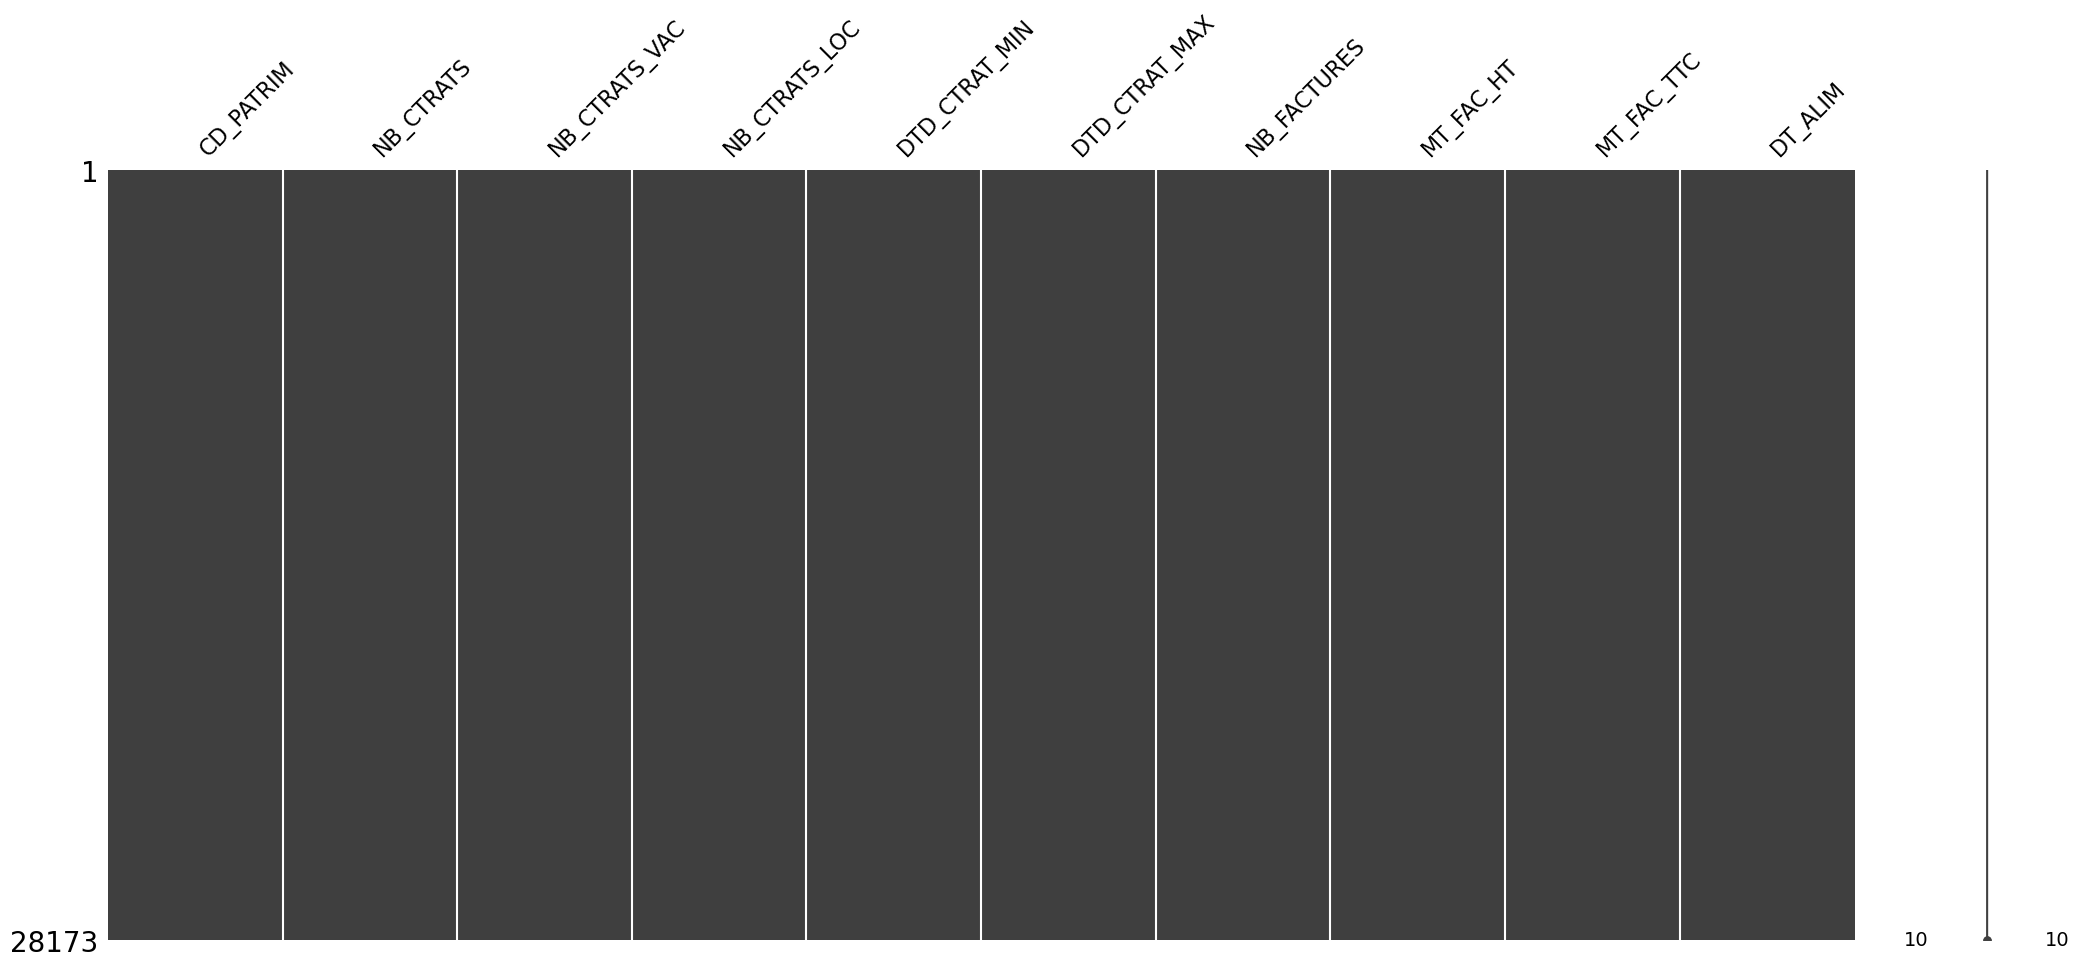

In [32]:
msno.matrix(edl_travaux)

# Data Cleaning

## EDL_ES = Etat des lieux Entrant Sortant

Conversion des colonnes cible en dates:

In [33]:
edl_es['DTD_CTRAT'] = pd.to_datetime(edl_es['DTD_CTRAT'])
edl_es['DTF_CTRAT'] = pd.to_datetime(edl_es['DTF_CTRAT'])
edl_es['DT_DOSEDL_ENT'] = pd.to_datetime(edl_es['DT_DOSEDL_ENT'])
edl_es['DT_DOSEDL_SOR'] = pd.to_datetime(edl_es['DT_DOSEDL_SOR'])

Liste des tache:

In [98]:
# concatenation des 3 colonnes: CD_PATRIM, NO_CTRACLI, NO_EDL_ENT
# affichier en double la colonne CD_PATRIM pour effectuer les jointures
# drop colonnes des colonnes: ID_PERS_ENT, ID_PERS_SOR
# mise en place du barem pour les colonnes: LB_NOTSANT_ENT, LB_NOTSANT_SOR
# ajouter une colonnes pour avoir la note global a l'entré et a la sortie
# creer un dataframe d'etat des lieux sortant et un dataframe ou les etats des lieux n'ont pas était défini

Creation du DataFrame de test:

In [34]:
test_edl_es  = edl_es.copy()

Creation de la cle primaire:

In [35]:
test_edl_es['cle_primaire'] = test_edl_es[['CD_PATRIM', 'NO_CTRACLI', 'NO_EDL_ENT']].astype(str).agg('-'.join, axis=1)

Drop des colonnes non pertinente:

In [36]:
test_edl_es.drop(columns = ['ID_PERS_ENT', 'ID_PERS_SOR', 'NO_CTRACLI', 'NO_EDL_ENT'], inplace = True)

Affichage des valeurs des colonnes cible pour le barem:

In [37]:
test_edl_es['LB_NOTSANT_ENT'].unique()

array(['BON ETAT                      ', 'USURE NORM                    ',
       'NEUF                          ', 'MANQUANT                      ',
       'ENDOMMAGE                     ', 'HORS SERVICE                  ',
       nan, 'VETUSTE                       ',
       'DETERIORE                     ', 'EN FONCTION                   '],
      dtype=object)

In [38]:
test_edl_es['LB_NOTSANT_SOR'].unique()

array(['BON ETAT                      ', 'USURE NORM                    ',
       'NEUF                          ', 'ENDOMMAGE                     ',
       'DETERIORE                     ', 'MANQUANT                      ',
       nan, 'EN FONCTION                   ',
       'VETUSTE                       ', 'HORS SERVICE                  '],
      dtype=object)

Mise en place du barem:

In [39]:
mapping = {
    'NEUF                          ': 100,
    'BON ETAT                      ': 85,
    'USURE NORM                    ': 75,
    'VETUSTE                       ': 35,
    'ENDOMMAGE                     ': 15,
    'DETERIORE                     ': 5,
    'MANQUANT                      ': 0,
    'EN FONCTION                   ': 0,
    'HORS SERVICE                  ': 0
}

In [40]:
test_edl_es['LB_NOTSANT_ENT'] = test_edl_es['LB_NOTSANT_ENT'].map(mapping)

In [41]:
test_edl_es['LB_NOTSANT_SOR'] = test_edl_es['LB_NOTSANT_SOR'].map(mapping)

Creation de la note global a l'entree et a la sortie:

In [62]:
edl_entree_globale = pd.DataFrame(test_edl_es.groupby('cle_primaire')['LB_NOTSANT_ENT'].sum())
edl_entree_globale.reset_index(inplace = True)

In [72]:
edl_entree_globale['cle_primaire'].nunique()

23219

In [64]:
edl_sortant_globale = pd.DataFrame(test_edl_es.groupby('cle_primaire')['LB_NOTSANT_SOR'].sum())
edl_sortant_globale.reset_index(inplace = True)

In [73]:
edl_sortant_globale['cle_primaire'].nunique()

23219

creation du dataframe avec les EDL entrant sortant:

In [65]:
edl_sortant = test_edl_es.dropna()
edl_sortant

,Unnamed: 0,CD_PATRIM,DTD_CTRAT,DTF_CTRAT,NO_CONSEDL_ENT,CD_TYPEDL_ENT,DT_DOSEDL_ENT,NO_EDL_SOR,NO_CONSEDL_SOR,CD_TYPEDL_SOR,DT_DOSEDL_SOR,LB_CONTENU1,LB_CONTENU2,LB_NOTSANT_ENT,LB_NOTSANT_SOR,cle_primaire
0,0,00001-00001-00001-00001,2015-07-17,2017-07-23,3,EDL ENTRANT,2015-07-17,103148.0,3.0,EDL SORTANT,2017-07-20,CELLIER,ARRIVEE M.A.LAVER,85.0,85.0,00001-00001-00001-00001-233486-87915
1,1,00001-00001-00001-00001,2015-07-17,2017-07-23,3,EDL ENTRANT,2015-07-17,103148.0,3.0,EDL SORTANT,2017-07-20,CELLIER,ACCESS. ELECTRIQUES,75.0,75.0,00001-00001-00001-00001-233486-87915
2,2,00001-00001-00001-00001,2015-07-17,2017-07-23,3,EDL ENTRANT,2015-07-17,103148.0,3.0,EDL SORTANT,2017-07-20,CELLIER,INTERRUPTEURS ELECT.,100.0,100.0,00001-00001-00001-00001-233486-87915
3,3,00001-00001-00001-00001,2015-07-17,2017-07-23,3,EDL ENTRANT,2015-07-17,103148.0,3.0,EDL SORTANT,2017-07-20,CELLIER,PRISES ELECTRIQUES,75.0,75.0,00001-00001-00001-00001-233486-87915
4,4,00001-00001-00001-00001,2015-07-17,2017-07-23,3,EDL ENTRANT,2015-07-17,103148.0,3.0,EDL SORTANT,2017-07-20,CELLIER,EVACUATION,85.0,85.0,00001-00001-00001-00001-233486-87915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731916,2731916,11814-00001-00001-00026,2022-12-01,2022-12-31,2,EDL ENTRANT SUITE MISE EN SERVICE,2022-11-28,142639.0,3.0,EDL SORTANT,2023-01-02,SALLE DE BAINS,SECHE SERVIETTE,100.0,100.0,11814-00001-00001-00026-302207-142019
2731917,2731917,11814-00001-00001-00026,2022-12-01,2022-12-31,2,EDL ENTRANT SUITE MISE EN SERVICE,2022-11-28,142639.0,3.0,EDL SORTANT,2023-01-02,SALLE DE BAINS,REVETEMENT SOL,100.0,100.0,11814-00001-00001-00026-302207-142019
2731918,2731918,11814-00001-00001-00026,2022-12-01,2022-12-31,2,EDL ENTRANT SUITE MISE EN SERVICE,2022-11-28,142639.0,3.0,EDL SORTANT,2023-01-02,SALLE DE BAINS,W.C,100.0,100.0,11814-00001-00001-00026-302207-142019
2731919,2731919,11814-00001-00001-00026,2022-12-01,2022-12-31,2,EDL ENTRANT SUITE MISE EN SERVICE,2022-11-28,142639.0,3.0,EDL SORTANT,2023-01-02,SALLE DE BAINS,MEUBLE SOUS LAVABO,100.0,100.0,11814-00001-00001-00026-302207-142019


In [66]:
edl_sortant = edl_sortant.merge(edl_entree_globale, on = 'cle_primaire', how = 'inner')

In [67]:
edl_sortant = edl_sortant.merge(edl_sortant_globale, on = 'cle_primaire', how = 'inner')

In [71]:
edl_sortant['cle_primaire'].nunique()

9952

In [69]:
edl_sortant.shape

(1137955, 18)

In [75]:
edl_entree_sortie = edl_sortant.drop_duplicates(subset = 'cle_primaire')
edl_entree_sortie

,Unnamed: 0,CD_PATRIM,DTD_CTRAT,DTF_CTRAT,NO_CONSEDL_ENT,CD_TYPEDL_ENT,DT_DOSEDL_ENT,NO_EDL_SOR,NO_CONSEDL_SOR,CD_TYPEDL_SOR,DT_DOSEDL_SOR,LB_CONTENU1,LB_CONTENU2,LB_NOTSANT_ENT_x,LB_NOTSANT_SOR_x,cle_primaire,LB_NOTSANT_ENT_y,LB_NOTSANT_SOR_y
0,0,00001-00001-00001-00001,2015-07-17,2017-07-23,3,EDL ENTRANT,2015-07-17,103148.0,3.0,EDL SORTANT,2017-07-20,CELLIER,ARRIVEE M.A.LAVER,85.0,85.0,00001-00001-00001-00001-233486-87915,7885.0,7865.0
97,97,00001-00001-00001-00001,2017-09-29,2020-10-31,3,EDL ENTRANT,2017-10-02,127369.0,3.0,EDL SORTANT AVEC HUISSIER,2020-11-06,CELLIER,ARRIVEE M.A.LAVER,85.0,85.0,00001-00001-00001-00001-258687-104496,8130.0,5170.0
188,389,00001-00001-00001-00014,2016-03-15,2017-04-19,3,EDL ENTRANT,2016-03-15,100920.0,3.0,EDL SORTANT,2017-04-13,CAVE,PLAFOND,85.0,75.0,00001-00001-00001-00014-238969-93130,9290.0,8445.0
290,607,00001-00001-00001-00023,2017-11-10,2021-10-29,3,EDL ENTRANT,2017-11-10,134360.0,3.0,EDL SORTANT,2021-10-29,CLES,CLE CAVE,85.0,85.0,00001-00001-00001-00023-259785-105390,7305.0,7150.0
377,694,00001-00001-00001-00032,2015-01-22,2017-01-12,3,EDL ENTRANT,2015-01-22,98957.0,3.0,EDL SORTANT,2017-01-12,CELLIER,INTERRUPTEURS ELECT.,85.0,85.0,00001-00001-00001-00032-229741-84201,6060.0,6680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137522,2720543,11796-00001-00001-00044,2022-11-17,2023-01-15,2,EDL ENTRANT SUITE MISE EN SERVICE,2022-11-17,142762.0,3.0,EDL SORTANT,2023-01-16,CAVE,ACCESS. ELECTRIQUES,100.0,100.0,11796-00001-00001-00044-301777-141802,11340.0,11140.0
1137635,2726870,11801-00002-00001-00032,2021-12-23,2022-01-27,2,EDL ENTRANT SUITE MISE EN SERVICE,2021-12-22,135997.0,3.0,EDL SORTANT,2022-01-20,CLES,CLE BOITE A. LETTRES,85.0,85.0,11801-00002-00001-00032-293988-135552,7540.0,7540.0
1137713,2729579,11812-00001-00001-00011,2022-09-29,2023-04-09,2,EDL ENTRANT SUITE MISE EN SERVICE,2022-09-29,144220.0,3.0,EDL SORTANT,2023-04-11,CELLIER,ACCESS. ELECTRIQUES,100.0,100.0,11812-00001-00001-00011-300366-140799,11555.0,11255.0
1137827,2730454,11814-00001-00001-00001,2022-12-01,2023-05-20,2,EDL ENTRANT SUITE MISE EN SERVICE,2022-11-29,144816.0,3.0,EDL SORTANT,2023-05-10,CLES,CLE ACCES IMMEUBLE,85.0,85.0,11814-00001-00001-00001-302204-142068,6055.0,6055.0


creation du dataframe avec que les entre:

In [76]:
test_edl_es.shape

(2734142, 16)

table pour tester notre formule d'hypotese

In [90]:
edl_entree = test_edl_es[test_edl_es['CD_TYPEDL_SOR'].isna()]
edl_entree.shape

(1574118, 16)

In [92]:
edl_entree = edl_entree.merge(edl_entree_globale, on='cle_primaire', how='inner')

In [94]:
edl_entree = edl_entree.drop_duplicates(subset = 'cle_primaire')

## edl_entree = Table des EDL entrant sans les sortie (locataire toujours dans le logement)

In [96]:
edl_entree

,Unnamed: 0,CD_PATRIM,DTD_CTRAT,DTF_CTRAT,NO_CONSEDL_ENT,CD_TYPEDL_ENT,DT_DOSEDL_ENT,NO_EDL_SOR,NO_CONSEDL_SOR,CD_TYPEDL_SOR,DT_DOSEDL_SOR,LB_CONTENU1,LB_CONTENU2,LB_NOTSANT_ENT_x,LB_NOTSANT_SOR,cle_primaire,LB_NOTSANT_ENT_y
0,194,00001-00001-00001-00004,2017-09-29,1900-01-01,3,EDL ENTRANT,2017-09-29,NaN,NaN,NaN,NaT,SALLE DE BAINS,ACCESS. VENTILATION,85.0,NaN,00001-00001-00001-00004-258331-104484,8975.0
109,303,00001-00001-00001-00012,2015-06-01,1900-01-01,3,EDL ENTRANT,2015-06-01,NaN,NaN,NaN,NaT,CELLIER,ACCESS. ELECTRIQUES,85.0,NaN,00001-00001-00001-00012-231917-86823,6850.0
195,504,00001-00001-00001-00014,2017-04-20,1900-01-01,3,EDL ENTRANT,2017-04-20,NaN,NaN,NaN,NaT,CHAMBRE 1,PLAFOND,85.0,NaN,00001-00001-00001-00014-255083-101118,8335.0
297,862,00003-00001-00001-00002,2014-03-10,1900-01-01,3,EDL ENTRANT,2014-03-05,NaN,NaN,NaN,NaT,CAVE,FENETRE,85.0,NaN,00003-00001-00001-00002-223455-77918,10205.0
421,1109,00003-00001-00001-00012,2017-07-03,1900-01-01,3,EDL ENTRANT,2017-06-27,NaN,NaN,NaN,NaT,CAVE,PLAFOND,75.0,NaN,00003-00001-00001-00012-255407-102623,10005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573503,2733527,11814-00003-00001-00004,2023-02-20,1900-01-01,2,EDL ENTRANT SUITE MISE EN SERVICE,2023-02-20,NaN,NaN,NaN,NaT,CLES,CLE ACCES IMMEUBLE,85.0,NaN,11814-00003-00001-00004-303842-143420,11925.0
1573624,2733648,11814-00003-00001-00005,2023-03-24,1900-01-01,2,EDL ENTRANT SUITE MISE EN SERVICE,2023-03-24,NaN,NaN,NaN,NaT,SEJOUR + CUISINE,PRISES ELECTRIQUES,100.0,NaN,11814-00003-00001-00005-304272-143855,9265.0
1573719,2733743,11814-00003-00001-00021,2023-05-10,1900-01-01,2,EDL ENTRANT SUITE MISE EN SERVICE,2023-05-10,NaN,NaN,NaN,NaT,HALL ENTREE,PLAFOND,85.0,NaN,11814-00003-00001-00021-305260-144791,12030.0
1573866,2733890,11814-00003-00001-00025,2023-01-19,1900-01-01,2,EDL ENTRANT SUITE MISE EN SERVICE,2023-01-19,NaN,NaN,NaN,NaT,CLES,CLE ACCES IMMEUBLE,85.0,NaN,11814-00003-00001-00025-302867-142788,10040.0


## edl_entree_sortie = Table des EDL d'entre et de sortie

In [97]:
edl_entree_sortie

,Unnamed: 0,CD_PATRIM,DTD_CTRAT,DTF_CTRAT,NO_CONSEDL_ENT,CD_TYPEDL_ENT,DT_DOSEDL_ENT,NO_EDL_SOR,NO_CONSEDL_SOR,CD_TYPEDL_SOR,DT_DOSEDL_SOR,LB_CONTENU1,LB_CONTENU2,LB_NOTSANT_ENT_x,LB_NOTSANT_SOR_x,cle_primaire,LB_NOTSANT_ENT_y,LB_NOTSANT_SOR_y
0,0,00001-00001-00001-00001,2015-07-17,2017-07-23,3,EDL ENTRANT,2015-07-17,103148.0,3.0,EDL SORTANT,2017-07-20,CELLIER,ARRIVEE M.A.LAVER,85.0,85.0,00001-00001-00001-00001-233486-87915,7885.0,7865.0
97,97,00001-00001-00001-00001,2017-09-29,2020-10-31,3,EDL ENTRANT,2017-10-02,127369.0,3.0,EDL SORTANT AVEC HUISSIER,2020-11-06,CELLIER,ARRIVEE M.A.LAVER,85.0,85.0,00001-00001-00001-00001-258687-104496,8130.0,5170.0
188,389,00001-00001-00001-00014,2016-03-15,2017-04-19,3,EDL ENTRANT,2016-03-15,100920.0,3.0,EDL SORTANT,2017-04-13,CAVE,PLAFOND,85.0,75.0,00001-00001-00001-00014-238969-93130,9290.0,8445.0
290,607,00001-00001-00001-00023,2017-11-10,2021-10-29,3,EDL ENTRANT,2017-11-10,134360.0,3.0,EDL SORTANT,2021-10-29,CLES,CLE CAVE,85.0,85.0,00001-00001-00001-00023-259785-105390,7305.0,7150.0
377,694,00001-00001-00001-00032,2015-01-22,2017-01-12,3,EDL ENTRANT,2015-01-22,98957.0,3.0,EDL SORTANT,2017-01-12,CELLIER,INTERRUPTEURS ELECT.,85.0,85.0,00001-00001-00001-00032-229741-84201,6060.0,6680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137522,2720543,11796-00001-00001-00044,2022-11-17,2023-01-15,2,EDL ENTRANT SUITE MISE EN SERVICE,2022-11-17,142762.0,3.0,EDL SORTANT,2023-01-16,CAVE,ACCESS. ELECTRIQUES,100.0,100.0,11796-00001-00001-00044-301777-141802,11340.0,11140.0
1137635,2726870,11801-00002-00001-00032,2021-12-23,2022-01-27,2,EDL ENTRANT SUITE MISE EN SERVICE,2021-12-22,135997.0,3.0,EDL SORTANT,2022-01-20,CLES,CLE BOITE A. LETTRES,85.0,85.0,11801-00002-00001-00032-293988-135552,7540.0,7540.0
1137713,2729579,11812-00001-00001-00011,2022-09-29,2023-04-09,2,EDL ENTRANT SUITE MISE EN SERVICE,2022-09-29,144220.0,3.0,EDL SORTANT,2023-04-11,CELLIER,ACCESS. ELECTRIQUES,100.0,100.0,11812-00001-00001-00011-300366-140799,11555.0,11255.0
1137827,2730454,11814-00001-00001-00001,2022-12-01,2023-05-20,2,EDL ENTRANT SUITE MISE EN SERVICE,2022-11-29,144816.0,3.0,EDL SORTANT,2023-05-10,CLES,CLE ACCES IMMEUBLE,85.0,85.0,11814-00001-00001-00001-302204-142068,6055.0,6055.0


## EDL_enquete = frais de non reponses aux enquetes 

Changement des colonnes cible en Datetime:

In [49]:
edl_enquete['DTD_CTRAT'] = pd.to_datetime(edl_enquete['DTD_CTRAT'], format='%Y-%m-%d')
edl_enquete['DTF_CTRAT'] = pd.to_datetime(edl_enquete['DTF_CTRAT'], format='%Y-%m-%d')
edl_enquete['DEBUT_FRAIS_DT_SID_FACTURA_GIM'] = pd.to_datetime(edl_enquete['DEBUT_FRAIS_DT_SID_FACTURA_GIM'], format='%Y-%m-%d')
edl_enquete['FIN_FRAIS_DT_SID_FACTURA_GIM'] = pd.to_datetime(edl_enquete['FIN_FRAIS_DT_SID_FACTURA_GIM'], format='%Y-%m-%d')

Changement des colonnes cible en Float:

In [50]:
edl_enquete['MT_CPT_PENALITE RETARD_SLS_EOS'] = edl_enquete['MT_CPT_PENALITE RETARD_SLS_EOS'].str.replace(',', '.').astype(float)
edl_enquete['MT_FRAIS DOSS_SLS_EOS'] = edl_enquete['MT_FRAIS DOSS_SLS_EOS'].str.replace(',', '.').astype(float)

Changement des colonnes cible en STR:

In [51]:
edl_enquete['PERS PHYSIQUE_MORALE'] = edl_enquete['PERS PHYSIQUE_MORALE'].astype(str)
edl_enquete['CD_PATRIM'] = edl_enquete['CD_PATRIM'].astype(str)

Suppression de la colonne DT_ALIM:

In [52]:
edl_enquete.drop(columns='DT_ALIM', inplace=True)

Suppression de la valeur manquante (1 ligne): (en attente)

In [53]:
# edl_enquete.dropna()

## EDL_patrimoine = Patrimoines des locataires sortant

In [100]:
# Liste des colonnes à conserver
test_edl_patrimoine = edl_patrimoine[[
    'CD_PATRIM', 'ON_ZONTEND', 'DATE MISE EN GESTION', 'DATE FIN CONSTRUCTION', 'ZZ_AGEBAT_EDL', 'ZZ_ANCBAT_EDL', 
    'TYPOLOGIE', 'CATEG PLAFOND LOYER', 'NO_DEPT', 'LB_DEPT', 'ZZ_LB_TYCONSTR', 'ZZ_LB_TY_CNV', 'MT_LOYER', 
    'MT_CHARGES', 'MT_TOTRUB', 'SURF_HAB', 'ZZ_REPCHA_SH_SUR_3', 'ZZ_MT_LOYER_M2_SH', 'ZZ_MT_CHARGES_M2_SH', 
    'ZZ_MT_TOTRUB_M2_SH', 'NO_EDL', 'NO CONSTAT', 'LB_TYPEDL', 'DT_DOSEDL', 'DT_CONSEDL', 'NO_CTRACLI', 
    'NB_EDL_SORTANT_AVEC_HUISSIER', 'MT FACTURE AU LOCATAIRE (MT_INDEMREEL)', 'MT_FA_PRO', 'MT_FA_REC', 
    'MT_REELEDL_HT', 'MT_REELEDL_TTC', 'DUREE OCCUPATION MM', 'DUREE OCCUPATION AA', 'CD_PHYMOR', 'NB_UC_ENTREE', 
    'MT_RES_UC_ENTREE', 'MT_NIVRES_BR_ENTREE', 'NB_OCCUPAN_ENTREE', 'NB_PERCHA_ENTREE', 'NB_ENFANT_ENTREE', 
    'ON_JEUMENA_ENTREE', 'ZZ_AGE_CL_ENTREE', 'ON_SEULE_ENTREE', 'ON_FAMMONO_ENTREE', 'ON_DALO_ENTREE', 
    'CD_CPDALO_ENTREE', 'LB_CPDALO_ENTREE', 'ON_PDALPD_ENTREE', 'CD_CPDALPD_ENTREE', 'MT_PLAFOND_ENTREE', 
    'MT_RESSOU_ENTREE', 'CD_CTRATYP', 'LB_CTRATYP', 'TY_AID_ENT', 'NOM_AIDENT', 'LB_SITFAM_ACTUEL', 'OST_ACTUEL', 
    'NB_OCCUPAN_ACTUEL', 'NB_ENFANT _ACTUEL', 'AN_TOTREVI_ACTUEL', 'MT_TOTREVI_ACTUEL', 'ON_FAMMONO_ACTUEL', 
    'ON_JEUMENA_ACTUEL', 'MT_SOLDLOY_ACTUEL', 'MT_SOLD_DG_ACTUEL', 'NB_SIT_1000', 'NB_SIT_9180', 'NB_SIT_4500', 
    'NB_SIT_8200', 'NB_TYPSIT_Expulsion', 'NB_TYPSIT_Information', 'NB_TYPSIT_Contentieux', 'NB_TYPSIT_Action_sociale', 
    'MT_SOLD_LOY_A_FIN_CONTRAT', 'NB_ECHRES_A_FIN_CONTRAT', 'DATE_PREM_IMPAYE', 'MT_SOLD_DEB_PREM_IMPAYE', 
    'PLAGE AGE DETTE_PREM_IMPAYE'
]]




In [102]:
test_edl_patrimoine.shape

(38966, 79)